## Observations and Insights 

<h1>Three Findings from Pymaceuticals Drug Regimen Trials</h1>

1. Mice were almost equally split among the drug regimens (total = 10), with 8 having 25 mice and 2 having 24 (after removing one mouse's measurements due to duplicate values).  The numbers of male and female mice were also almost equal.  These even distribution should make it easier to compare results across the different drug regimens and with male vs. female mice.  Further analysis might reveal differences in treatment results by sex, but was not completed in this project.

2. Of the four regimens that were further analyzed, two (Capomulin and Ramicane) resulted in lower final tumor volumes than the other two (Infubinol and Ceftamin).  Further analysis could look at the difference between initial and final tumor volumes to see if this result was due to smaller tumors initially or if mice on the first two regimens showed greater reductions in tumor volume.

3.  There is a strong correlation between a mouse's weight and the average tumor volume (r = .84)  Heavier mice are more likely to have larger tumors by volume than lighter mice.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# create original dataframes, then merge them.
mouse_df = pd.DataFrame(mouse_metadata)
study_df = pd.DataFrame(study_results)
mouse_results_df = pd.merge(mouse_df, study_df, on="Mouse ID")
# Display the data table for preview
mouse_results_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_count = len(mouse_df)
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_duplicate = mouse_results_df[mouse_results_df.duplicated(['Mouse ID', "Timepoint"])]

# extract the mouse_ID from this
mouse_ID = mouse_duplicate.iloc[0,0]
mouse_ID

'g989'

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df = mouse_results_df[mouse_results_df["Mouse ID"] == mouse_ID]
duplicate_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_results_df = mouse_results_df[mouse_results_df['Mouse ID'] != 'g989']
clean_mouse_results_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count = len(pd.unique(clean_mouse_results_df["Mouse ID"]))
mice_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_df = clean_mouse_results_df.groupby(["Drug Regimen"])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_list = regimen_df["Tumor Volume (mm3)"].mean()
median_list = regimen_df["Tumor Volume (mm3)"].median()
variance_list = regimen_df["Tumor Volume (mm3)"].var()
stddev_list = regimen_df["Tumor Volume (mm3)"].std()
sem_list = regimen_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.  Must rename as we go
summary_stats_df = pd.merge(mean_list, median_list, on=["Drug Regimen"])
summary_stats_df.rename(columns = {"Tumor Volume (mm3)_x": "Mean Tumor Volume", "Tumor Volume (mm3)_y": "Median Tumor Volume"}, inplace=True)
summary_stats_df = pd.merge(summary_stats_df, variance_list, on=["Drug Regimen"])
summary_stats_df.rename(columns = {"Tumor Volume (mm3)": "Variance - Tumor Volume"}, inplace=True)
summary_stats_df = pd.merge(summary_stats_df, stddev_list, on=["Drug Regimen"])
summary_stats_df.rename(columns = {"Tumor Volume (mm3)": "Standard Deviation - Tumor Volume"}, inplace=True)
summary_stats_df = pd.merge(summary_stats_df, sem_list, on=["Drug Regimen"])
summary_stats_df.rename(columns = {"Tumor Volume (mm3)": "Standard Error - Tumor Volume"}, inplace=True)
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Variance - Tumor Volume,Standard Deviation - Tumor Volume,Standard Error - Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_regimen_df = regimen_df["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

agg_regimen_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

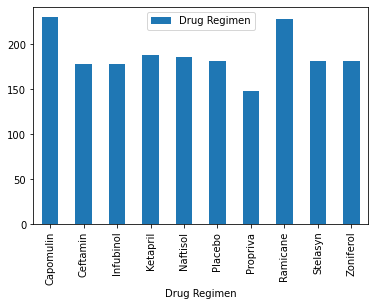

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# This instruction is incorrect according to the grading rubric, so I will also include the rubric chart in next section.
# Data shows each drug regimen and the number of times it is in the clean data
regimen_counts = regimen_df['Drug Regimen'].count()

pandas_bar = regimen_counts.plot.bar(x="Drug Regimen", y="Measurements")
pandas_bar.legend(loc="best")


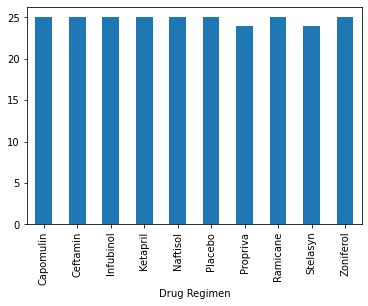

In [10]:
# Generate a bar plot showing the TOTAL NUMBER OF UNIQUE MICE FOR EACH TREATMENT REGIMEN
# need to drop the duplicate rows to just get one mouse row per Id
new_regimen_df = clean_mouse_results_df.drop_duplicates(subset=['Mouse ID'])
# Group this by Drug Regimen
mouse_regimen_df = new_regimen_df.groupby(["Drug Regimen"])
#Count the mice per regimen
mouse_regimen_counts = mouse_regimen_df['Drug Regimen'].count()
#Plot using pandas .plot.bar
pandas_bar = mouse_regimen_counts.plot.bar(x="Drug Regimen", y="Number of Mice")


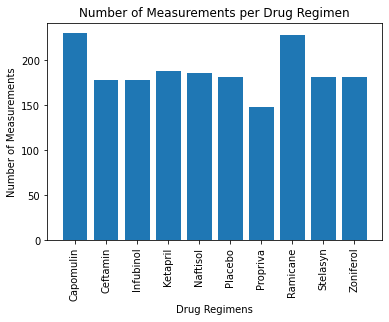

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# This first bar plot follows the instructions here and in the homework instructions -- the grading rubric instructions are
#  in the next section
summary_regimen_df = pd.DataFrame(regimen_counts)
regimens = summary_regimen_df.index
x_axis = np.arange(len(regimen_counts))

# Plot the bar chart and add the title, axes.
plt.bar(x_axis, summary_regimen_df["Drug Regimen"])
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, regimens, rotation="vertical")
plt.title("Number of Measurements per Drug Regimen")
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Measurements")
plt.savefig("Drug Regimen Measurements.png")
plt.show()

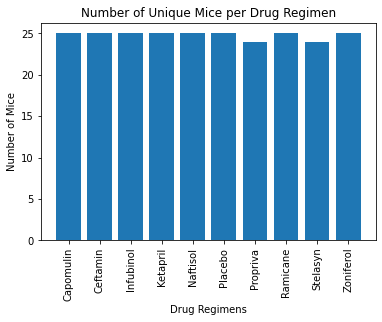

In [12]:
# Grading rubric asks for bar plot of number of unique mice for each treatment regimen
mouse_summary_regimen_df = pd.DataFrame(mouse_regimen_counts)
mouse_regimens = mouse_summary_regimen_df.index
x_axis = np.arange(len(mouse_regimen_counts))

plt.bar(x_axis, mouse_summary_regimen_df["Drug Regimen"])
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, regimens, rotation="vertical")
plt.title("Number of Unique Mice per Drug Regimen")
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Mice")
plt.savefig("Drug Regimen Mouse Counts.png")
plt.show()

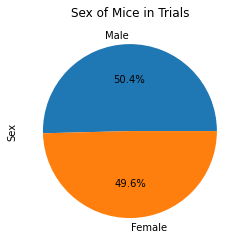

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# use the new_regimen_df list of mice from the calculations above as it already is a unique list of mice.
mouses = new_regimen_df["Sex"].value_counts()
mouses.plot(kind= 'pie', y="Sex", title="Sex of Mice in Trials",autopct='%1.1f%%')


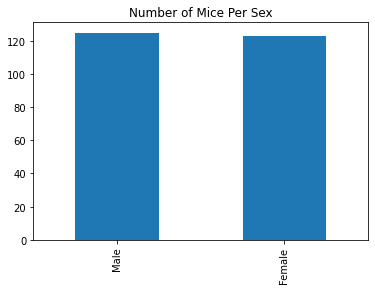

In [14]:
# Grading rubric asks for bar plot as well.
mouses.plot(kind='bar', y="Sex", title="Number of Mice Per Sex")

Text(0.5, 1.0, 'Sex of Mice in Trials')

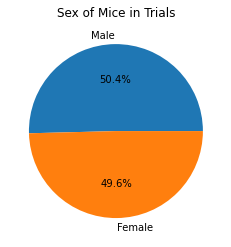

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouses, labels=mouses.index, autopct="%1.1f%%")
plt.title("Sex of Mice in Trials")

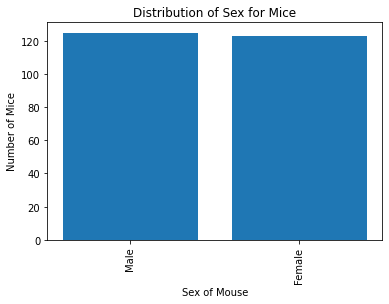

In [16]:
# Provide bar plot as well
mouse_summary_df = pd.DataFrame(mouses)
sexes = mouse_summary_df.index
x_axis = np.arange(len(sexes))

plt.bar(x_axis, mouse_summary_df["Sex"])
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, sexes, rotation="vertical")
plt.title("Distribution of Sex for Mice")
plt.xlabel("Sex of Mouse")
plt.ylabel("Number of Mice")
plt.savefig("Mouse Sex Distribution.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Should be able to use the dropduplicate by keeping the last
last_mouse_df = clean_mouse_results_df.drop_duplicates(subset=["Mouse ID"], keep='last')
last_mouse_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [18]:
# Put treatments into a list 
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# sort the mouse tumor data by Drug Regiment and Tumor Volume
mouse_tumors_df = last_mouse_df.sort_values(["Drug Regimen", "Tumor Volume (mm3)"])

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
mouse_tumors_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,s185,Capomulin,Female,3,17,45,23.343598,1
39,m601,Capomulin,Male,22,17,45,28.430964,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
64,f966,Capomulin,Male,16,17,20,30.485985,0
104,u364,Capomulin,Male,18,17,45,31.023923,3


In [19]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# start with the treatment to create of list of lists for tumor_vol.  

for treatment in treatments:    
    # create list with first element the treatment
    mouse_tumors = []
    # Locate the rows which contain mice on each drug and get the tumor volumes using list comprehension
    mouse_tumors = mouse_tumors_df.loc[mouse_tumors_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    # save to the list of lists tumor_vol
    tumor_vol.append(mouse_tumors)

    # Determine outliers using upper and lower bounds
    quartiles = mouse_tumors.quantile([.25,.5,.75])
    print(quartiles)
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    print(f"For treatment: {treatment}")
    print(f"The lower quartile of tumor volume is: {lowerq}")
    print(f"The upper quartile of tumor volume is: {upperq}")
    print(f"The interquartile range of tumor volume is: {iqr}")
    print(f"The the median of tumor volume is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

    # need to create list of potential outliers for each series
    outliers = []
    tumors = mouse_tumors.tolist()
    for i in range(0,len(tumors)):
        if tumors[i] > upper_bound or tumors[i] < lower_bound:
            outliers.append(tumors[i])
                            
    print(f"Possible {treatment} outliers are: {outliers}")
    print("")

0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64
For treatment: Capomulin
The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
The the median of tumor volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Possible Capomulin outliers are: []

0.25    31.560470
0.50    36.561652
0.75    40.659006
Name: Tumor Volume (mm3), dtype: float64
For treatment: Ramicane
The lower quartile of tumor volume is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volume is: 9.098536719999998
The the median of tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Possible Ramicane outliers are: []

0.25    54.048608
0.50    60.165180
0.75    65.525743
Name: Tumor Vol

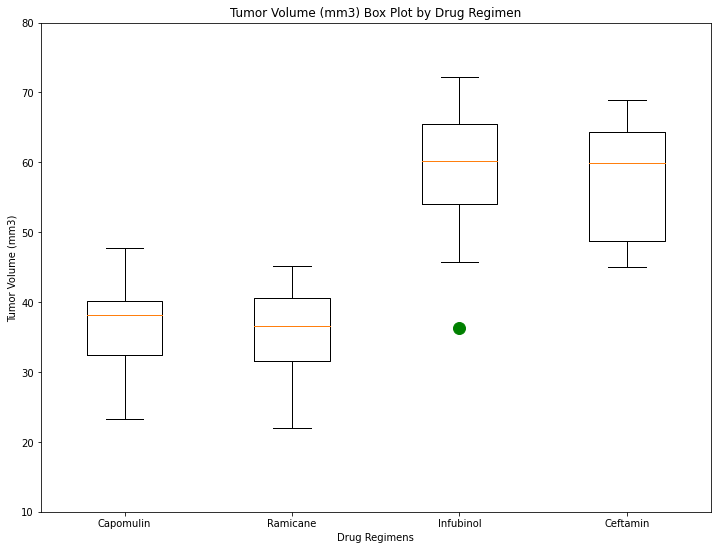

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig = plt.figure(1, figsize=(12,9))
ax = fig.add_subplot(111)
ax.set_xticklabels(treatments)
ax.set_xlabel("Drug Regimens")
ax.set_title("Tumor Volume (mm3) Box Plot by Drug Regimen")
ax.set_ylim(10, 80)
ax.set_ylabel("Tumor Volume (mm3)")
flierprops = dict(marker='o', markerfacecolor='g', markersize=12,
                  linestyle='none', markeredgecolor='g')
bp = ax.boxplot(tumor_vol, flierprops=flierprops)
fig.savefig('tumor measurements box plot.png')

## Line and Scatter Plots

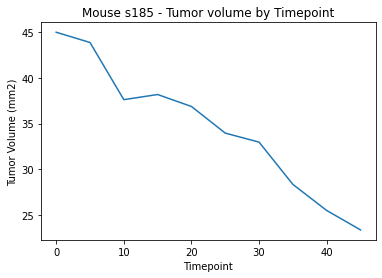

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# I will use Mouse ID s185 
mouse = "s185"
clean_mouse_results_df.head()
one_mouse_df = clean_mouse_results_df.loc[clean_mouse_results_df["Mouse ID"] == mouse, ["Timepoint","Tumor Volume (mm3)"]]
plt.plot(one_mouse_df["Timepoint"], one_mouse_df["Tumor Volume (mm3)"])
plt.xticks()
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm2)')
plt.title('Mouse s185 - Tumor volume by Timepoint')
plt.show()

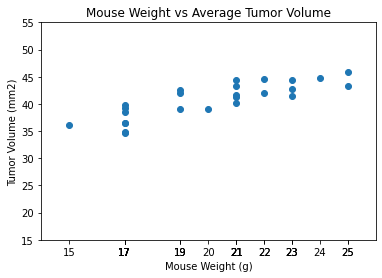

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_mouse_df = clean_mouse_results_df.loc[clean_mouse_results_df["Drug Regimen"] == 'Capomulin', 
                                                ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
# create the data for the scatterplot
# Since every weight for a mouse is the same, median is the same as mouse weight
weight = capomulin_mouse_df.groupby("Mouse ID")["Weight (g)"].median()

# Get the average for each mouse of tumor volume
volume = capomulin_mouse_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# create scatterplot
plt.scatter(weight, volume)
plt.xticks(weight)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm2)')
plt.title('Mouse Weight vs Average Tumor Volume')
plt.xlim(14,26)
plt.ylim(15,55)
plt.show()

## Correlation and Regression

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(st.pearsonr(weight,volume)[0],2)}")

The correlation coefficient between mouse weight and average tumor volume is 0.84


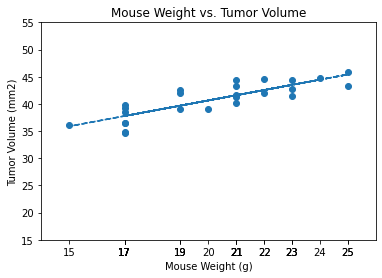

In [24]:
# The linear regression model
# Calculate the components of the linear regression to create the plot again with the regression line
v_slope, v_int, v_r, v_p, v_std_err = st.linregress(weight, volume)

# Calculate the line
v_fit = weight * v_slope + v_int

# Recreate scatter, with line plot of the v_fit
plt.scatter(weight, volume)
plt.plot(weight,v_fit,"--")
plt.xticks(weight)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm2)')
plt.xlim(14,26)
plt.ylim(15,55)
plt.title('Mouse Weight vs. Tumor Volume')
plt.show()